# Código Fonte - Filhos do Python

Neste trecho, importamos as bibliotecas utilizadas para a análise de dados, bem como os arquivos de treino e de teste do modelo preditivo. Inicialmente, os dataframes são unidos formando o 'data_complete' para que, no cálculo posterior das médias móveis, não ocorra prejuízo dos dados.

In [137]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

pd.set_option('display.max_rows',1000)
pd.set_option('display.max_columns',1000)

data0 = pd.read_csv('data.csv')

dataTest0 = pd.read_csv("test.csv")
dataTest0 = dataTest0.iloc[1:]  
data_complete = data0.append(dataTest0, ignore_index = True)

display(data_complete)

,DT_COMPTC,IBOV,Dol,NDX,SPX,DJI,Fluxo,CAPTC_DIA,RESG_DIA,selic,selic_cumulated,ipca,ipca_cumulated,igpm,igpm_cumulated,cdi,cdi_cumulated,Shanghai,EMBI,IBOV_FUT,IBrX_100,IDol_FUT
0,2005-01-03,25722.00,2.6759,1603.51,1202.08,10729.43,20.621,21.124,0.502,1.38,1.38,0.58,0.58,0.39,0.39,1.38,1.38,1191.823,8868.0,26.183,7.702,89.57
1,2005-01-04,24848.00,2.7190,1571.83,1188.05,10630.78,3.777,9.247,5.470,1.38,1.38,0.58,0.58,0.39,0.39,1.38,1.38,1191.823,8868.0,25.325,7.522,89.57
2,2005-01-05,24691.80,2.7140,1563.76,1183.74,10597.83,2.692,8.484,5.792,1.38,1.38,0.58,0.58,0.39,0.39,1.38,1.38,1191.823,8868.0,25.160,7.450,89.57
3,2005-01-06,24366.90,2.7218,1557.52,1187.89,10622.88,14.528,21.616,7.088,1.38,1.38,0.58,0.58,0.39,0.39,1.38,1.38,1191.823,8868.0,24.766,7.391,89.57
4,2005-01-07,24747.20,2.7120,1564.81,1186.19,10603.96,-2.328,5.981,8.309,1.38,1.38,0.58,0.58,0.39,0.39,1.38,1.38,1191.823,8868.0,25.166,7.474,89.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4415,2022-07-20,98286.83,5.4704,12439.68,3959.90,31874.84,NaN,NaN,NaN,1.03,450.88,-0.68,167.29,0.21,260.71,0.99,446.42,3253.240,6962.0,28.033,8.491,90.60
4416,2022-07-21,99033.17,5.4988,12619.41,3998.95,32036.90,NaN,NaN,NaN,1.03,450.88,-0.68,167.29,0.21,260.71,0.99,446.42,3253.240,6962.0,28.033,8.491,90.60
4417,2022-07-22,98924.82,5.4976,12396.47,3961.63,31899.29,NaN,NaN,NaN,1.03,450.88,-0.68,167.29,0.21,260.71,0.99,446.42,3253.240,6962.0,28.033,8.491,90.60
4418,2022-07-25,100269.85,5.3589,12328.41,3966.84,31990.04,NaN,NaN,NaN,1.03,450.88,-0.68,167.29,0.21,260.71,0.99,446.42,3253.240,6962.0,28.033,8.491,90.60


Neste trecho, realizou-se o cálculo das médias móveis simples de períodos 3, 15, 30, 45, 60, 90 e 120. Em seguida, realiza-se a união dos dados gerados no 'data_complete'.

In [138]:
def sma(period,df):
    med=df[:period]
    for i in range(period,len(df)+1):
        value = round(np.mean(df[i-period:i]),3)
        med.append(value)
    return med

def info_compt(dados, name):
    sma3 = sma(3,list(dados[name]))
    sma15 = sma(15,list(dados[name]))
    sma30 = sma(30,list(dados[name]))
    sma45 = sma(45,list(dados[name]))
    sma60 = sma(60,list(dados[name]))
    sma90 = sma(90,list(dados[name]))
    sma120 = sma(120,list(dados[name]))
    mtx=[]
    for i in range(len(dados)):
        mtx.append([dados['DT_COMPTC'][i],sma3[i],sma15[i], sma30[i], sma45[i], sma60[i], sma90[i], sma120[i]])
    df =pd.DataFrame(mtx, columns=['DT_COMPTC',(name+"_sma3"),(name+'_sma15'),(name+'_sma30'), (name+'_sma45'), (name+'_sma60'), (name+'_sma90'), (name+'_sma120')])
    return df

df = info_compt(data_complete,'IBOV')
data_complete = data_complete.merge(df, on='DT_COMPTC')
df = info_compt(data_complete,'Dol')
data_complete = data_complete.merge(df, on='DT_COMPTC')
df = info_compt(data_complete,'NDX')
data_complete = data_complete.merge(df, on='DT_COMPTC')
df = info_compt(data_complete,'SPX')
data_complete = data_complete.merge(df, on='DT_COMPTC')
df = info_compt(data_complete,'DJI')
data_complete = data_complete.merge(df, on='DT_COMPTC')
df = info_compt(data_complete,'selic')
data_complete = data_complete.merge(df, on='DT_COMPTC')
df = info_compt(data_complete,'selic_cumulated')
data_complete = data_complete.merge(df, on='DT_COMPTC')
df = info_compt(data_complete,'ipca')
data_complete = data_complete.merge(df, on='DT_COMPTC')
df = info_compt(data_complete,'ipca_cumulated')
data_complete = data_complete.merge(df, on='DT_COMPTC')
df = info_compt(data_complete,'igpm')
data_complete = data_complete.merge(df, on='DT_COMPTC')
df = info_compt(data_complete,'igpm_cumulated')
data_complete = data_complete.merge(df, on='DT_COMPTC')
df = info_compt(data_complete,'cdi')
data_complete = data_complete.merge(df, on='DT_COMPTC')
df = info_compt(data_complete,'cdi_cumulated')
data_complete = data_complete.merge(df, on='DT_COMPTC')
df = info_compt(data_complete,'Shanghai')
data_complete = data_complete.merge(df, on='DT_COMPTC')
df = info_compt(data_complete,'EMBI')
data_complete = data_complete.merge(df, on='DT_COMPTC')
df = info_compt(data_complete,'IBOV_FUT')
data_complete = data_complete.merge(df, on='DT_COMPTC')
df = info_compt(data_complete,'IBrX_100')
data_complete = data_complete.merge(df, on='DT_COMPTC')
df = info_compt(data_complete,'IDol_FUT')
data_complete = data_complete.merge(df, on='DT_COMPTC')

display(data_complete)

,DT_COMPTC,IBOV,Dol,NDX,SPX,DJI,Fluxo,CAPTC_DIA,RESG_DIA,selic,selic_cumulated,ipca,ipca_cumulated,igpm,igpm_cumulated,cdi,cdi_cumulated,Shanghai,EMBI,IBOV_FUT,IBrX_100,IDol_FUT,IBOV_sma3,IBOV_sma15,IBOV_sma30,IBOV_sma45,IBOV_sma60,IBOV_sma90,IBOV_sma120,Dol_sma3,Dol_sma15,Dol_sma30,Dol_sma45,Dol_sma60,Dol_sma90,Dol_sma120,NDX_sma3,NDX_sma15,NDX_sma30,NDX_sma45,NDX_sma60,NDX_sma90,NDX_sma120,SPX_sma3,SPX_sma15,SPX_sma30,SPX_sma45,SPX_sma60,SPX_sma90,SPX_sma120,DJI_sma3,DJI_sma15,DJI_sma30,DJI_sma45,DJI_sma60,DJI_sma90,DJI_sma120,selic_sma3,selic_sma15,selic_sma30,selic_sma45,selic_sma60,selic_sma90,selic_sma120,selic_cumulated_sma3,selic_cumulated_sma15,selic_cumulated_sma30,selic_cumulated_sma45,selic_cumulated_sma60,selic_cumulated_sma90,selic_cumulated_sma120,ipca_sma3,ipca_sma15,ipca_sma30,ipca_sma45,ipca_sma60,ipca_sma90,ipca_sma120,ipca_cumulated_sma3,ipca_cumulated_sma15,ipca_cumulated_sma30,ipca_cumulated_sma45,ipca_cumulated_sma60,ipca_cumulated_sma90,ipca_cumulated_sma120,igpm_sma3,igpm_sma15,igpm_sma30,igpm_sma45,igpm_sma60,igpm_sma90,igpm_sma120,igpm_cumulated_sma3,igpm_cumulated_sma15,igpm_cumulated_sma30,igpm_cumulated_sma45,igpm_cumulated_sma60,igpm_cumulated_sma90,igpm_cumulated_sma120,cdi_sma3,cdi_sma15,cdi_sma30,cdi_sma45,cdi_sma60,cdi_sma90,cdi_sma120,cdi_cumulated_sma3,cdi_cumulated_sma15,cdi_cumulated_sma30,cdi_cumulated_sma45,cdi_cumulated_sma60,cdi_cumulated_sma90,cdi_cumulated_sma120,Shanghai_sma3,Shanghai_sma15,Shanghai_sma30,Shanghai_sma45,Shanghai_sma60,Shanghai_sma90,Shanghai_sma120,EMBI_sma3,EMBI_sma15,EMBI_sma30,EMBI_sma45,EMBI_sma60,EMBI_sma90,EMBI_sma120,IBOV_FUT_sma3,IBOV_FUT_sma15,IBOV_FUT_sma30,IBOV_FUT_sma45,IBOV_FUT_sma60,IBOV_FUT_sma90,IBOV_FUT_sma120,IBrX_100_sma3,IBrX_100_sma15,IBrX_100_sma30,IBrX_100_sma45,IBrX_100_sma60,IBrX_100_sma90,IBrX_100_sma120,IDol_FUT_sma3,IDol_FUT_sma15,IDol_FUT_sma30,IDol_FUT_sma45,IDol_FUT_sma60,IDol_FUT_sma90,IDol_FUT_sma120
0,2005-01-03,25722.00,2.6759,1603.51,1202.08,10729.43,20.621,21.124,0.502,1.38,1.38,0.58,0.58,0.39,0.39,1.38,1.38,1191.823,8868.0,26.183,7.702,89.57,25722.000,25722.000,25722.000,25722.000,25722.000,25722.000,25722.000,2.6759,2.6759,2.6759,2.6759,2.6759,2.6759,2.6759,1603.510,1603.510,1603.510,1603.510,1603.510,1603.510,1603.510,1202.080,1202.080,1202.080,1202.080,1202.080,1202.080,1202.080,10729.430,10729.430,10729.430,10729.430,10729.430,10729.430,10729.430,1.38,1.380,1.380,1.380,1.380,1.380,1.380,1.38,1.380,1.380,1.380,1.380,1.380,1.380,0.58,0.58,0.580,0.580,0.580,0.580,0.580,0.58,0.580,0.580,0.580,0.580,0.580,0.580,0.39,0.390,0.390,0.390,0.390,0.390,0.390,0.39,0.390,0.390,0.390,0.390,0.390,0.390,1.38,1.380,1.380,1.380,1.380,1.380,1.380,1.38,1.380,1.380,1.380,1.380,1.380,1.380,1191.823,1191.823,1191.823,1191.823,1191.823,1191.823,1191.823,8868.0,8868.000,8868.000,8868.000,8868.000,8868.000,8868.000,26.183,26.183,26.183,26.183,26.183,26.183,26.183,7.702,7.702,7.702,7.702,7.702,7.702,7.702,89.57,89.57,89.57,89.57,89.57,89.57,89.57
1,2005-01-04,24848.00,2.7190,1571.83,1188.05,10630.78,3.777,9.247,5.470,1.38,1.38,0.58,0.58,0.39,0.39,1.38,1.38,1191.823,8868.0,25.325,7.522,89.57,24848.000,24848.000,24848.000,24848.000,24848.000,24848.000,24848.000,2.7190,2.7190,2.7190,2.7190,2.7190,2.7190,2.7190,1571.830,1571.830,1571.830,1571.830,1571.830,1571.830,1571.830,1188.050,1188.050,1188.050,1188.050,1188.050,1188.050,1188.050,10630.780,10630.780,10630.780,10630.780,10630.780,10630.780,10630.780,1.38,1.380,1.380,1.380,1.380,1.380,1.380,1.38,1.380,1.380,1.380,1.380,1.380,1.380,0.58,0.58,0.580,0.580,0.580,0.580,0.580,0.58,0.580,0.580,0.580,0.580,0.580,0.580,0.39,0.390,0.390,0.390,0.390,0.390,0.390,0.39,0.390,0.390,0.390,0.390,0.390,0.390,1.38,1.380,1.380,1.380,1.380,1.380,1.380,1.38,1.380,1.380,1.380,1.380,1.380,1.380,1191.823,1191.823,1191.823,1191.823,1191.823,1191.823,1191.823,8868.0,8868.000,8868.000,8868.000,8868.000,8868.000,8868.000,25.325,25.325,25.325,25.325,25.325,25.325,25.325,7.522,7.522,7.522,7.522,7.522,7.522,7.522,89.57,89.57,89.57,89

Nesta etapa, os valores do fluxo, da captção e do resgate são corrigidos pelo valor da inflação acumulada no período. Os novos dados gerados são também inseridos no 'data_complete'.

In [139]:
inf = data_complete['ipca_cumulated'].to_numpy()
fluxo = data_complete['Fluxo'].to_numpy()
captc =  data_complete['CAPTC_DIA'].to_numpy()
resg =  data_complete['RESG_DIA'].to_numpy()
date = data_complete['DT_COMPTC'].to_numpy()

fluxo_fixed_ipca = (fluxo/(1+inf/100))
captc_fixed_ipca =  (captc/(1+inf/100))
resg_fixed_ipca =  (resg/(1+inf/100))

df = pd.DataFrame({"DT_COMPTC": date,'Fluxo_fixed_inf' : fluxo_fixed_ipca,'CAPTC_fixed_inf' : captc_fixed_ipca,'RESG_fixed_inf' : resg_fixed_ipca})

data_complete = data_complete.merge(df, on='DT_COMPTC', left_index=True)

display(data_complete)

,DT_COMPTC,IBOV,Dol,NDX,SPX,DJI,Fluxo,CAPTC_DIA,RESG_DIA,selic,selic_cumulated,ipca,ipca_cumulated,igpm,igpm_cumulated,cdi,cdi_cumulated,Shanghai,EMBI,IBOV_FUT,IBrX_100,IDol_FUT,IBOV_sma3,IBOV_sma15,IBOV_sma30,IBOV_sma45,IBOV_sma60,IBOV_sma90,IBOV_sma120,Dol_sma3,Dol_sma15,Dol_sma30,Dol_sma45,Dol_sma60,Dol_sma90,Dol_sma120,NDX_sma3,NDX_sma15,NDX_sma30,NDX_sma45,NDX_sma60,NDX_sma90,NDX_sma120,SPX_sma3,SPX_sma15,SPX_sma30,SPX_sma45,SPX_sma60,SPX_sma90,SPX_sma120,DJI_sma3,DJI_sma15,DJI_sma30,DJI_sma45,DJI_sma60,DJI_sma90,DJI_sma120,selic_sma3,selic_sma15,selic_sma30,selic_sma45,selic_sma60,selic_sma90,selic_sma120,selic_cumulated_sma3,selic_cumulated_sma15,selic_cumulated_sma30,selic_cumulated_sma45,selic_cumulated_sma60,selic_cumulated_sma90,selic_cumulated_sma120,ipca_sma3,ipca_sma15,ipca_sma30,ipca_sma45,ipca_sma60,ipca_sma90,ipca_sma120,ipca_cumulated_sma3,ipca_cumulated_sma15,ipca_cumulated_sma30,ipca_cumulated_sma45,ipca_cumulated_sma60,ipca_cumulated_sma90,ipca_cumulated_sma120,igpm_sma3,igpm_sma15,igpm_sma30,igpm_sma45,igpm_sma60,igpm_sma90,igpm_sma120,igpm_cumulated_sma3,igpm_cumulated_sma15,igpm_cumulated_sma30,igpm_cumulated_sma45,igpm_cumulated_sma60,igpm_cumulated_sma90,igpm_cumulated_sma120,cdi_sma3,cdi_sma15,cdi_sma30,cdi_sma45,cdi_sma60,cdi_sma90,cdi_sma120,cdi_cumulated_sma3,cdi_cumulated_sma15,cdi_cumulated_sma30,cdi_cumulated_sma45,cdi_cumulated_sma60,cdi_cumulated_sma90,cdi_cumulated_sma120,Shanghai_sma3,Shanghai_sma15,Shanghai_sma30,Shanghai_sma45,Shanghai_sma60,Shanghai_sma90,Shanghai_sma120,EMBI_sma3,EMBI_sma15,EMBI_sma30,EMBI_sma45,EMBI_sma60,EMBI_sma90,EMBI_sma120,IBOV_FUT_sma3,IBOV_FUT_sma15,IBOV_FUT_sma30,IBOV_FUT_sma45,IBOV_FUT_sma60,IBOV_FUT_sma90,IBOV_FUT_sma120,IBrX_100_sma3,IBrX_100_sma15,IBrX_100_sma30,IBrX_100_sma45,IBrX_100_sma60,IBrX_100_sma90,IBrX_100_sma120,IDol_FUT_sma3,IDol_FUT_sma15,IDol_FUT_sma30,IDol_FUT_sma45,IDol_FUT_sma60,IDol_FUT_sma90,IDol_FUT_sma120,Fluxo_fixed_inf,CAPTC_fixed_inf,RESG_fixed_inf
0,2005-01-03,25722.00,2.6759,1603.51,1202.08,10729.43,20.621,21.124,0.502,1.38,1.38,0.58,0.58,0.39,0.39,1.38,1.38,1191.823,8868.0,26.183,7.702,89.57,25722.000,25722.000,25722.000,25722.000,25722.000,25722.000,25722.000,2.6759,2.6759,2.6759,2.6759,2.6759,2.6759,2.6759,1603.510,1603.510,1603.510,1603.510,1603.510,1603.510,1603.510,1202.080,1202.080,1202.080,1202.080,1202.080,1202.080,1202.080,10729.430,10729.430,10729.430,10729.430,10729.430,10729.430,10729.430,1.38,1.380,1.380,1.380,1.380,1.380,1.380,1.38,1.380,1.380,1.380,1.380,1.380,1.380,0.58,0.58,0.580,0.580,0.580,0.580,0.580,0.58,0.580,0.580,0.580,0.580,0.580,0.580,0.39,0.390,0.390,0.390,0.390,0.390,0.390,0.39,0.390,0.390,0.390,0.390,0.390,0.390,1.38,1.380,1.380,1.380,1.380,1.380,1.380,1.38,1.380,1.380,1.380,1.380,1.380,1.380,1191.823,1191.823,1191.823,1191.823,1191.823,1191.823,1191.823,8868.0,8868.000,8868.000,8868.000,8868.000,8868.000,8868.000,26.183,26.183,26.183,26.183,26.183,26.183,26.183,7.702,7.702,7.702,7.702,7.702,7.702,7.702,89.57,89.57,89.57,89.57,89.57,89.57,89.57,20.502088,21.002187,0.499105
1,2005-01-04,24848.00,2.7190,1571.83,1188.05,10630.78,3.777,9.247,5.470,1.38,1.38,0.58,0.58,0.39,0.39,1.38,1.38,1191.823,8868.0,25.325,7.522,89.57,24848.000,24848.000,24848.000,24848.000,24848.000,24848.000,24848.000,2.7190,2.7190,2.7190,2.7190,2.7190,2.7190,2.7190,1571.830,1571.830,1571.830,1571.830,1571.830,1571.830,1571.830,1188.050,1188.050,1188.050,1188.050,1188.050,1188.050,1188.050,10630.780,10630.780,10630.780,10630.780,10630.780,10630.780,10630.780,1.38,1.380,1.380,1.380,1.380,1.380,1.380,1.38,1.380,1.380,1.380,1.380,1.380,1.380,0.58,0.58,0.580,0.580,0.580,0.580,0.580,0.58,0.580,0.580,0.580,0.580,0.580,0.580,0.39,0.390,0.390,0.390,0.390,0.390,0.390,0.39,0.390,0.390,0.390,0.390,0.390,0.390,1.38,1.380,1.380,1.380,1.380,1.380,1.380,1.38,1.380,1.380,1.380,1.380,1.380,1.380,1191.823,1191.823,1191.823,1191.823,1191.823,1191.823,1191.823,8868.0,8868.000,8868.000,8868.000,8868.000,8868.000,8868.000,25.325,25.325,25.325,25.325,25.325,

Neste momento, com as transformações de dados realizadas, separarou-se o 'data_complete' em sua parte correspondente de treino: 'data_final'; e de teste: 'dataTest_final'. Por fim, analisou-se a correlação dos indicadores com a váriavel do resgate corrigida pela inflação (que por sinal era aquela com menores taxas de correlação) para a seleção dos indicadores adequados.

In [140]:
data_final = data_complete.iloc[:-299]
dataTest_final = data_complete.iloc[-300:]

cor = data_final.corr()
display(cor[['RESG_fixed_inf']].nlargest(1000,'RESG_fixed_inf'))

,RESG_fixed_inf
RESG_fixed_inf,1.000000
RESG_DIA,0.993375
CAPTC_DIA,0.256023
CAPTC_fixed_inf,0.245574
IBOV_sma45,0.191068
IBOV_sma30,0.190484
IBOV_sma60,0.190279
IBOV_sma15,0.188967
IBOV_sma90,0.188437
IBOV_sma120,0.187991


Neste momento, realizou-se a retirada dos outliers no fluxo que superassem o módulo de 800. Além disso, definiu-se os índices na variável 'info' que serão utilizados no modelo.

In [141]:
data_final = data_final.drop(data_final[data_final["Fluxo"]>800].index)
data_final = data_final.drop(data_final[data_final["Fluxo"]<-800].index)

info0=['DT_COMPTC','IBOV_sma45','Dol','NDX_sma3','SPX_sma45','DJI_sma30','igpm_cumulated','selic_sma90']
info = info0+ ['Fluxo','CAPTC_fixed_inf','RESG_fixed_inf']

Aqui importou-se as bibliotecas que serão utilizadas para a implementação do modelo de regressão liner bem como para avaliar seu desempenho.

In [128]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import  mean_squared_error

Aqui, buscando considerar a influência do dia da semana no fluxo, optou-se por criar um vetor one hot encoding de dummies que representassem os dias da semana e incrementou-o na base de dados.

In [142]:
data = data_final

data = data[info]

wd =pd.to_datetime(data["DT_COMPTC"]).dt.weekday
wd = pd.get_dummies(wd)
data = wd.merge(data, left_index=True, right_index=True)
del(data["DT_COMPTC"])

Nessa última seção, primeiramente, os dados são separados em treino e teste para avaliação do modelo. Em seguida, cada um desses conjuntos é dividido em variáveis de entrada (X) e na saída desejada (Y). São criados dois regressores: um que utiliza a captação como variável de saída Y, e outro que utiliza o resgate. Ambos são treinados e usados para a previsão separada da captação e resgate. A previsão dessas parcelas isoladas é subtraída gerando a previsão do fluxo. Por fim, o modelo gerado para os dados de treino é avaliado em uma parcela deles é utilizado para prever os dados finais do desafio.

Erro da captação no modelo de treino: 84.6769241495753
Erro do resgate no modelo de treino: 75.3094652763446
Erro do fluxo no modelo de treino: 142.81424842492748
pos 101
neg 32
porcent de acerto do sentido: 44.333333333333336
Erro real: 738.1750809596555


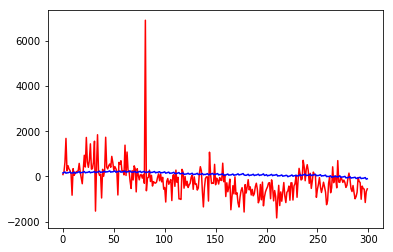

In [155]:
npdata = data.to_numpy()

trainData, testData = train_test_split(npdata, test_size =0.3)

indice_final = data.shape[1]-3

indicec = data.shape[1]-2
indicer= data.shape[1]-1

X_train = trainData[:, :indice_final]
Y_train = trainData[:, indicec]

X_test = testData[:, :indice_final]
Y_test = testData[:,indicec]


regressorC = LinearRegression()
regressorC.fit(X_train, Y_train)

Q_testCap = regressorC.predict(X_test)

mse = mean_squared_error(Y_test, Q_testCap)
rmse = np.sqrt(mse)
print('Erro da captação no modelo de treino:',rmse)

X_train = trainData[:, :indice_final]
Y_train = trainData[:, indicer]

X_test = testData[:, :indice_final]
Y_test = testData[:,indicer]


regressorR = LinearRegression()
regressorR.fit(X_train, Y_train)

Q_testResg = regressorR.predict(X_test)

mse = mean_squared_error(Y_test, Q_testResg)
rmse = np.sqrt(mse)
print('Erro do resgate no modelo de treino:',rmse)

Q_test = Q_testCap - Q_testResg
Y_test = testData[:, indice_final]

mse = mean_squared_error(Y_test, Q_test)
rmse = np.sqrt(mse)
print('Erro do fluxo no modelo de treino:',rmse)

dataTest = dataTest_final

inf = dataTest['ipca_cumulated'].to_numpy()

dataTest = dataTest[info0]

wdTest =pd.to_datetime(dataTest["DT_COMPTC"]).dt.weekday
wdTest = pd.get_dummies(wdTest)
dataTest = wdTest.merge(dataTest, left_index=True,right_index=True)

time = pd.DataFrame(dataTest["DT_COMPTC"], columns =['DT_COMPTC'])
del(dataTest["DT_COMPTC"])

npTest = dataTest.to_numpy()

Q_C = regressorC.predict(npTest[:,:])
Q_R = regressorR.predict(npTest[:,:])

Q_Cinf = Q_C*(1 + 0.01*inf)
Q_Rinf = Q_R*(1 + 0.01*inf)

Q_flux = Q_Cinf-Q_Rinf

df_teste = pd.DataFrame({"DT_COMPTC": time["DT_COMPTC"].to_numpy(),'Fluxo' : Q_flux})

fluxo_real = (pd.read_csv('fluxo_real.csv'))

fluxo_r = (fluxo_real[['Fluxo']].to_numpy())/1000000

pos=0
neg=0
for i in range(len(df_teste)):
    if df_teste['Fluxo'][i]>0 and fluxo_r[i]>0:
        pos+=1
    if df_teste['Fluxo'][i]<0 and fluxo_r[i]<0:
        neg+=1
print('pos',pos)
print('neg',neg)
print('porcent de acerto do sentido:',100*(pos+neg)/len(df_teste))

mse = mean_squared_error(fluxo_r, df_teste['Fluxo'])
rmse = np.sqrt(mse)
print('Erro real:',rmse)

plt.plot(fluxo_r, color = 'red')
plt.plot(df_teste['Fluxo'], color = 'blue')

plt.show()

Por fim, feita a análise do modelo e tendo encontrado um resultado com potencial, realizou-se a criação de um arquivo do tipo '.csv' nos moldes necessários para a submissão.

In [124]:
df_teste.to_csv('submission.csv', index = False)